### Description of the Problem


#### import required library

In [127]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [128]:
# Load the Data-Set

In [129]:
df = pd.read_csv('D:\\Datasets\\CC GENERAL.csv')

In [130]:
# Print the head of Data-Set

In [131]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [132]:
# Dimensionality of Data-Set

In [133]:
df.shape

(8950, 18)

In [134]:
# information of Data-Set

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [136]:
# statistical description of Data-Set

In [137]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Text(0.5, 1.0, 'Box-Plot Visualization..')

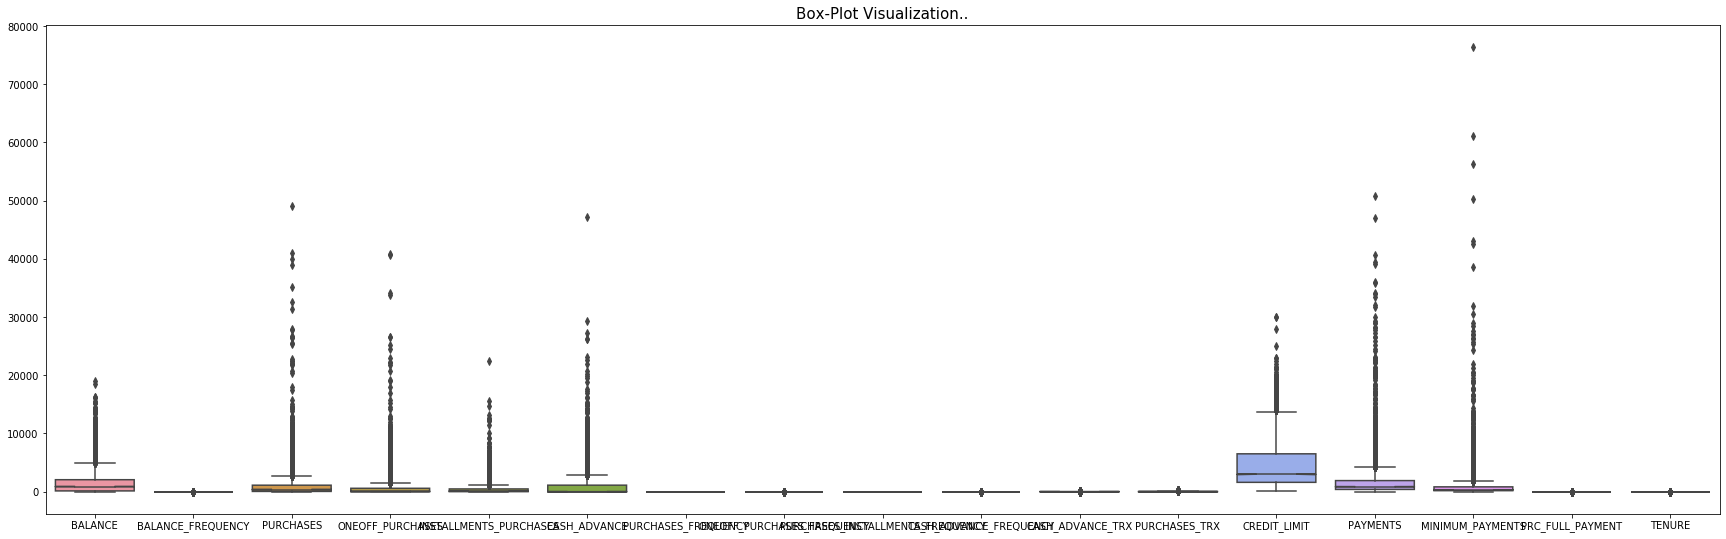

In [138]:
plt.figure(figsize=(30,9))
sns.boxplot(data=df, notch=True,)
plt.title('Box-Plot Visualization..', fontsize=15)

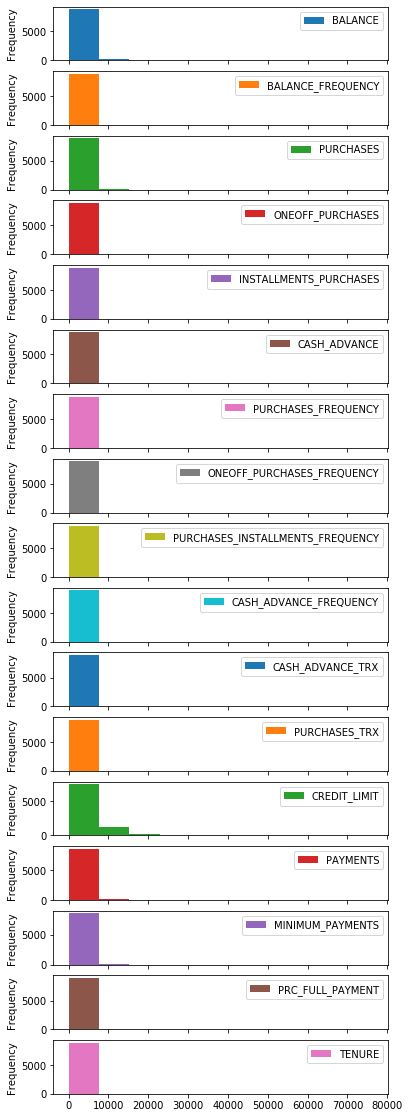

In [139]:
df.plot(kind='hist', subplots=True, figsize=(6,20), sharex=True)
plt.show()

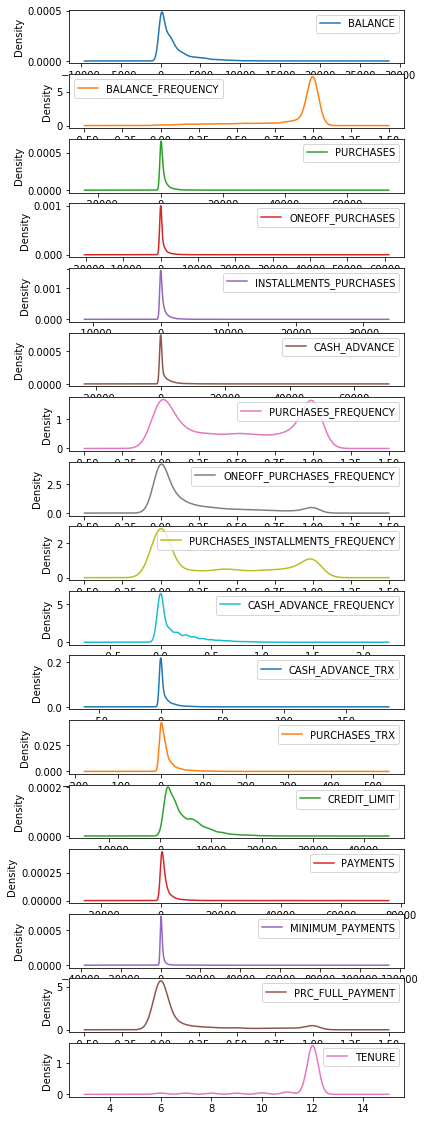

In [140]:
df.plot(kind='kde', subplots=True, figsize=(6,20), sharex=False, )
plt.show()

In [141]:
## Check the null value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


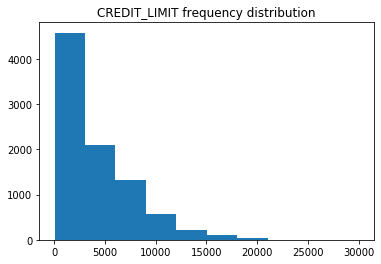

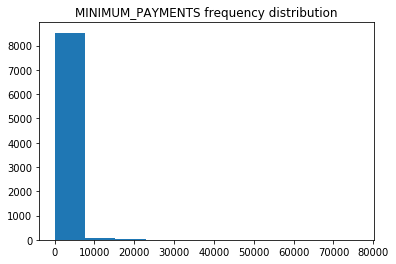

In [142]:
null = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
for i in null:
    plt.subplots(1,1)
    plt.hist(x=df[i])
    plt.title(f'{i} frequency distribution')

In [143]:
for i in null:
    median = df[i].median()
    df[i].fillna(value=median, inplace=True)

In [144]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [145]:
## Drop the Cutomer id column 

In [146]:
df_data = df.drop(labels='CUST_ID', axis=1)

In [147]:
## Cheack the correlation between features

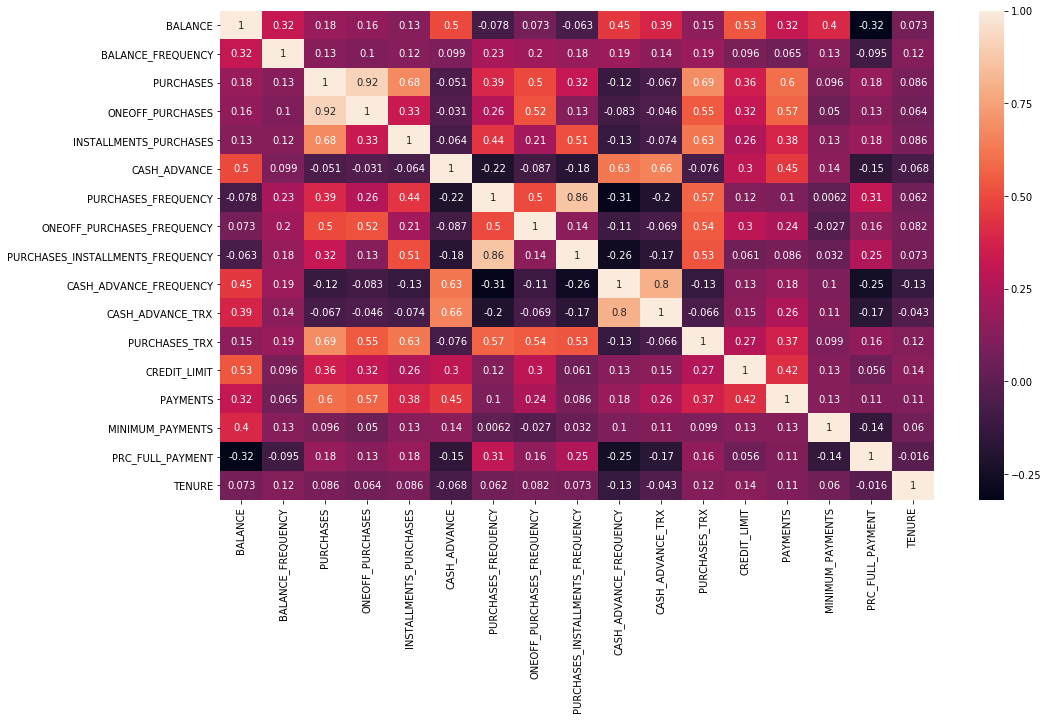

In [148]:
corr = df_data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(data=corr, annot=True, )

 As upper boxplot visualization we have some features which conatins outliers, so we will use Robust Scalar.
    
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [149]:
rs  =RobustScaler()

In [150]:
df_data_scaled = rs.fit_transform(df_data)

In [151]:
df_data_scaled

mm = MinMaxScaler()
df_data_scaled = mm.fit_transform(df_data_scaled)
df_data_scaled.min()

0.0

In [152]:
component = [i for i in range(0,17)]
variance = []

for i in component:
    pca = PCA(n_components=i, )
    fit = pca.fit(df_data_scaled)
    var = np.sum(fit.explained_variance_ratio_)
    variance.append(var)

Text(0.5, 1.0, 'PCA-Variance plot')

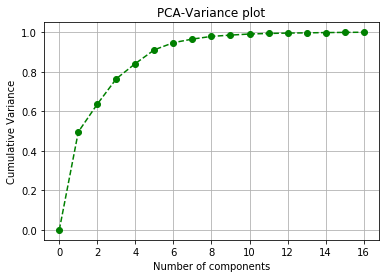

In [153]:
plt.plot(component, variance, 'go--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')
plt.grid(which='both', )
plt.title('PCA-Variance plot')

As per visulaization we get arround 90% variance with 7 n_component.
So we will fit our PCA model with n_component=7 or above.

In [154]:
pca = PCA(n_components=9)
pca_component = pca.fit_transform(df_data_scaled)

In [155]:
pca_component

array([[-0.48216769, -0.09765264, -0.04647341, ...,  0.01860217,
         0.01599751,  0.01305379],
       [-0.60857495, -0.01937583,  0.08210922, ...,  0.04746713,
         0.00185586,  0.0059023 ],
       [ 0.30450847,  0.92093391,  0.01220424, ..., -0.00654718,
        -0.27786759,  0.00851471],
       ...,
       [ 0.36038344, -0.42268649,  0.10586875, ...,  0.09053604,
        -0.07254693,  0.02264731],
       [-0.64610006, -0.20439151,  0.28175796, ...,  0.09578194,
         0.11934769, -0.00098068],
       [-0.0946022 ,  0.39951371,  0.1959914 , ..., -0.11222427,
        -0.06769675,  0.02242068]])

Before Applying Any Clustering Algorithms except DBSCAN, we have a major problem with number of cluster that we have to specified on calling the model

To overcome this problem we will gonna be used Elbow method.

In [156]:
k=[i for i in range(1,10)]
interia = []
for i in k:
    kmean = KMeans(n_clusters=i,)
    kmean.fit(pca_component)
    distance = kmean.inertia_
    interia.append(distance)

Text(0.5, 1.0, 'Elbow-Plot')

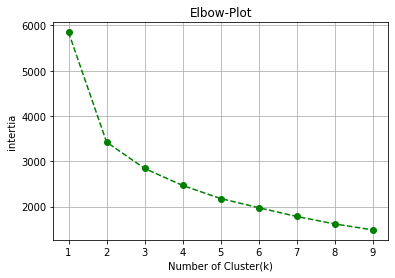

In [157]:
plt.plot(k, interia, 'go--')
plt.xlabel('Number of Cluster(k)')
plt.ylabel('intertia')
plt.grid(which='both', )
plt.title('Elbow-Plot')

In [158]:
## Applying K-means model

In [159]:
kmean = KMeans(n_clusters=4,)
kmean_fit = kmean.fit(pca_component)

In [160]:
Clusters = kmean.labels_
Clusters

array([0, 0, 2, ..., 1, 0, 2])

In [161]:
Cluster_centres = kmean.cluster_centers_
Cluster_centres

array([[-0.49689524,  0.05005307, -0.08932058, -0.06177561, -0.08800646,
        -0.0115483 ,  0.00758576,  0.0113444 , -0.00136292],
       [ 0.56732441, -0.24946057, -0.09146306, -0.01138337, -0.02753658,
        -0.01516433, -0.00665884, -0.02988662,  0.00061092],
       [ 0.55818483,  0.51272329,  0.11902426,  0.05496039,  0.03683596,
         0.00924577, -0.0030564 ,  0.02467286, -0.00066131],
       [-0.40742239, -0.19137239,  0.33383624,  0.14759529,  0.28334818,
         0.05767272, -0.00454346,  0.00351794,  0.00351499]])

In [162]:
df_data['Class'] = Clusters

In [163]:
df_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Class
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [165]:
df_data.groupby(by='Class').sum()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Class,,,,,,,,,,,,,,,,,
0,7.972065e+06,3525.820185,1065585.50,863306.78,202875.27,5.834660e+06,498.267927,317.659024,182.531638,821.253967,19644,9851,1.541057e+07,5.431296e+06,3.708945e+06,83.863566,41942
1,3.168208e+06,2497.129582,2923478.07,749825.70,2175445.65,1.398663e+06,2372.389354,274.547366,2235.489975,197.388918,4817,57231,1.061497e+07,3.804092e+06,2.541541e+06,604.529908,30933
2,2.676031e+06,1367.376033,4564949.43,3403680.99,1161268.44,9.119975e+05,1264.677989,1130.226848,689.740253,129.255211,3231,60446,9.495697e+06,4.591920e+06,1.069629e+06,388.348896,16487
3,1.857464e+05,461.247194,424670.26,285501.00,139466.06,6.155752e+05,253.302138,89.563030,153.952341,61.642497,1385,4125,4.702587e+06,1.684330e+06,2.418013e+05,299.003734,13718


In [166]:
df_data.groupby(by='Class').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Class,,,,,,,,,,,,,,,,,
0,2184.725867,0.966243,292.021239,236.587224,55.597498,1598.975143,0.136549,0.087054,0.050022,0.225063,5.383393,2.699644,4223.231354,1488.434057,1016.427708,0.022983,11.494108
1,1179.526452,0.929683,1088.413280,279.160722,809.920197,520.723557,0.883242,0.102214,0.832275,0.073488,1.793373,21.307148,3951.963135,1416.266509,946.217662,0.225067,11.516381
2,1907.363186,0.974609,3253.705937,2426.002131,827.703806,650.033845,0.901410,0.805579,0.491618,0.092128,2.302922,43.083393,6768.137757,3272.929290,762.386968,0.276799,11.751247
3,153.256122,0.380567,350.388003,235.561881,115.071007,507.900330,0.208995,0.073897,0.127023,0.050860,1.142739,3.403465,3880.022002,1389.711193,199.506022,0.246703,11.318482


## Interpretation of Clusters

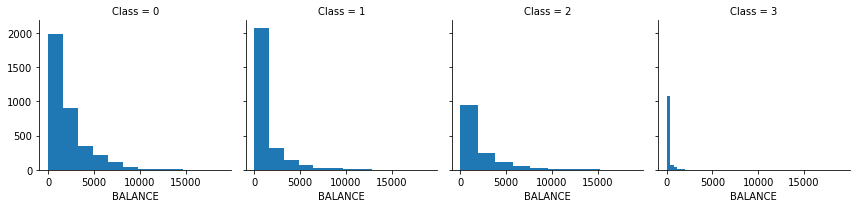

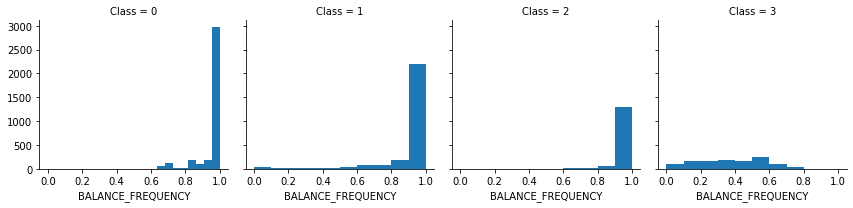

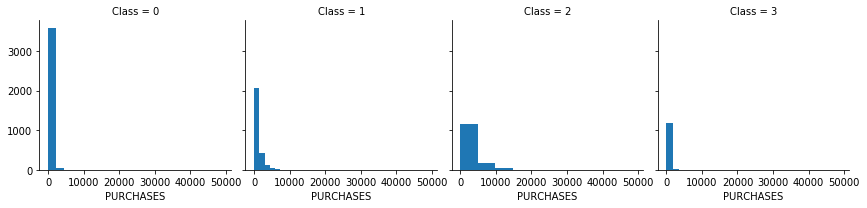

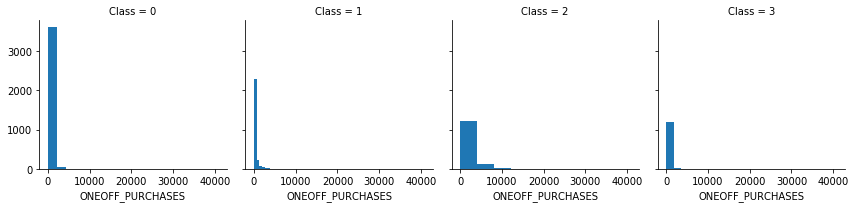

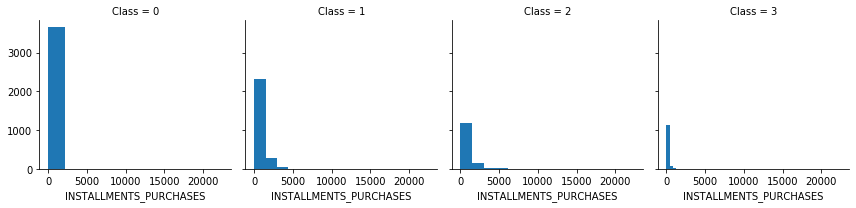

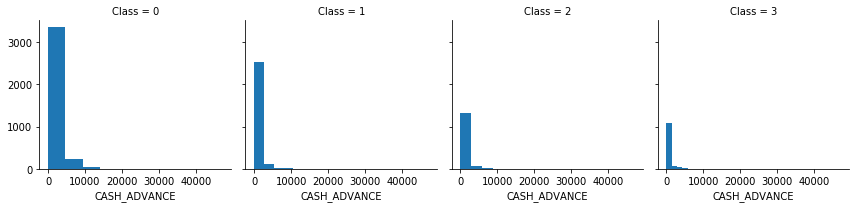

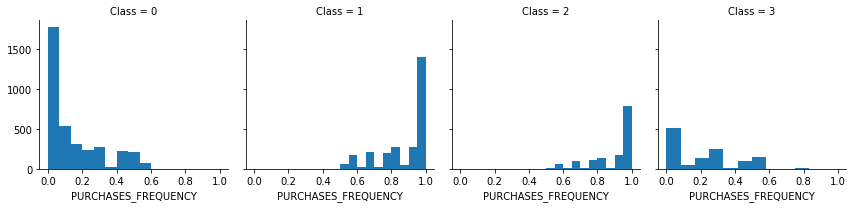

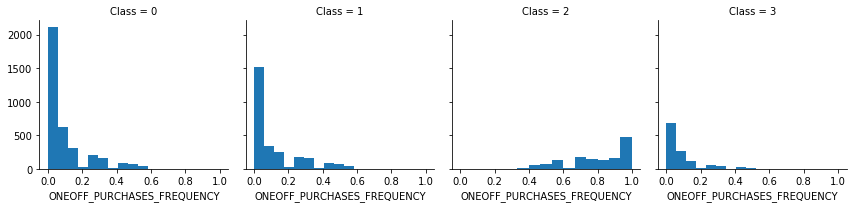

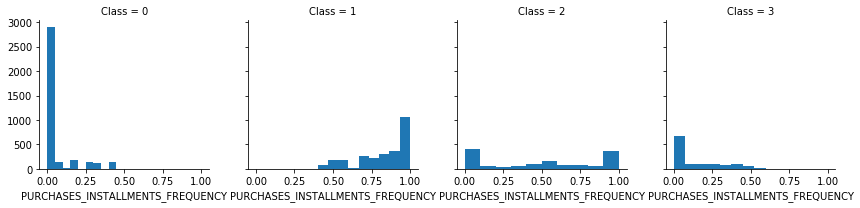

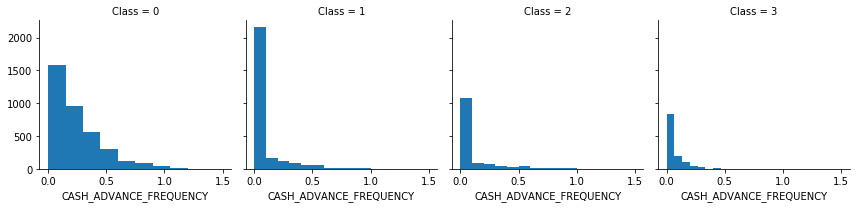

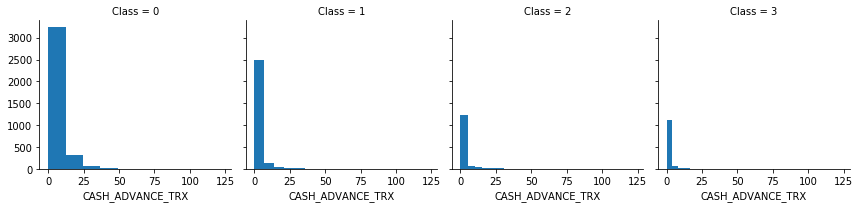

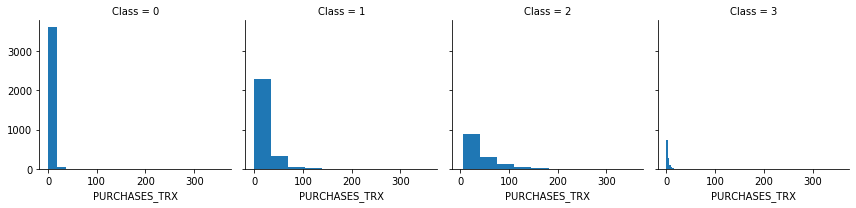

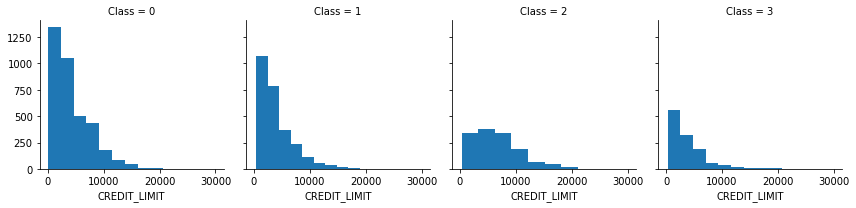

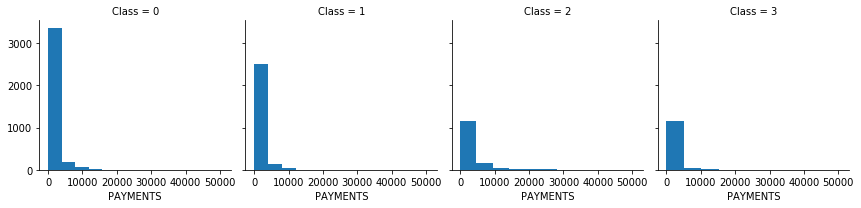

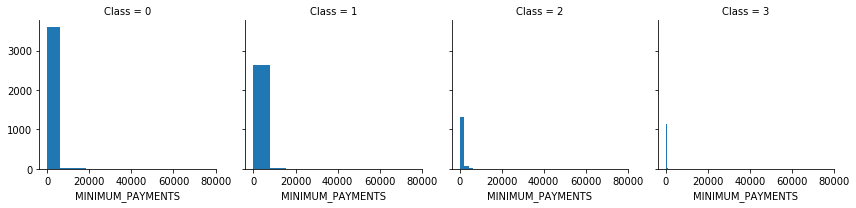

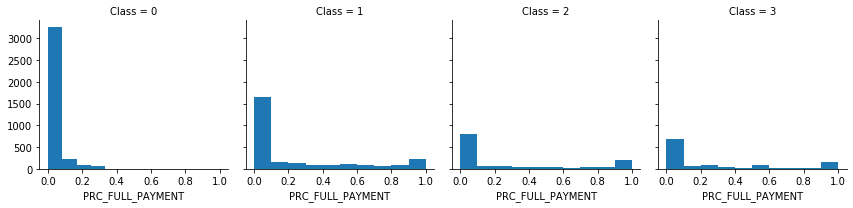

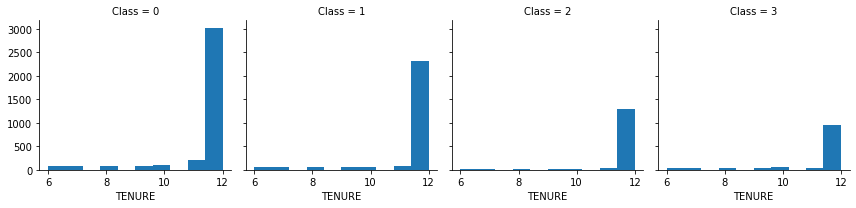

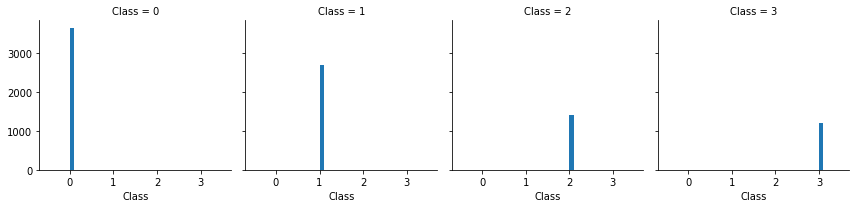

In [167]:
for c in df_data:
    grid= sns.FacetGrid(data=df_data, col='Class')
    grid.map(plt.hist, c)

## Visualization of Clusters
Using PCA to transform data to 2 dimensions for visualization

In [168]:
pca_visual =PCA(n_components=2)

In [169]:
pca_component_visual = pca_visual.fit_transform(df_data_scaled)

In [170]:
pca_component_visual

array([[-0.48216769, -0.09765264],
       [-0.60857495, -0.01937583],
       [ 0.30450847,  0.92093391],
       ...,
       [ 0.36038344, -0.42268649],
       [-0.64610006, -0.20439151],
       [-0.0946022 ,  0.39951371]])

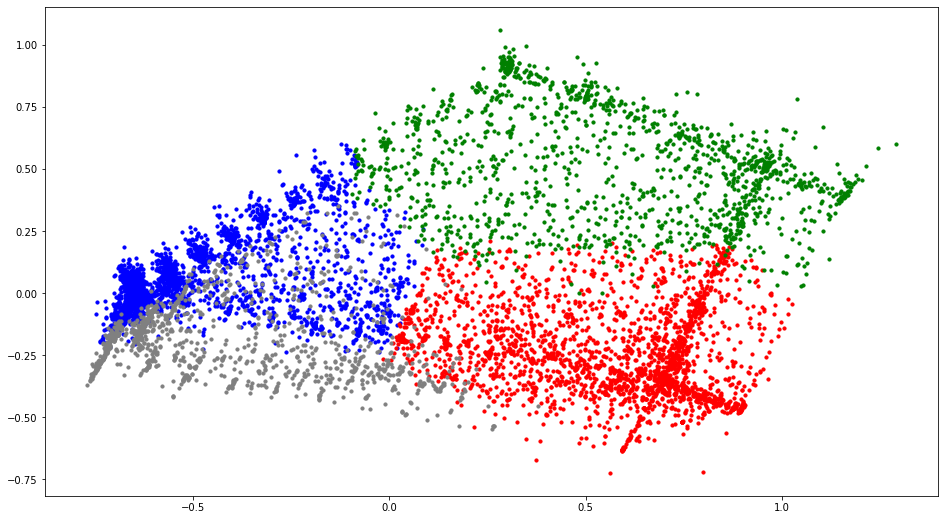

In [171]:
plt.figure(figsize=(16,9))
plt.scatter(pca_component_visual[Clusters==0, 0], pca_component_visual[Clusters==0, 1], color = 'B', s=10, )
plt.scatter(pca_component_visual[Clusters==1, 0], pca_component_visual[Clusters==1, 1], color = 'R', s=10, )
plt.scatter(pca_component_visual[Clusters==2, 0], pca_component_visual[Clusters==2, 1], color = 'g', s=10, )
plt.scatter(pca_component_visual[Clusters==3, 0], pca_component_visual[Clusters==3, 1], color = 'Grey', s=10, )

## DBSCAN 

In [172]:
from sklearn.cluster import DBSCAN

In [271]:
dbscan = DBSCAN(eps=0.220, min_samples=7)

In [272]:
dbscan.fit(pca_component)

DBSCAN(algorithm='auto', eps=0.22, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [281]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([ 855, 8074,    8,    7,    6], dtype=int64))

In [276]:
Clusters = dbscan.labels_
Clusters

array([ 0,  0,  0, ..., -1, -1, -1], dtype=int64)

In [274]:
df_data['Class'] = dbscan.labels_

In [298]:
# plt.figure(figsize=(16,9))
# plt.scatter(pca_component_visual[Clusters==0, 0], pca_component_visual[Clusters==0, 1], color = 'B', s=10, )
# plt.scatter(pca_component_visual[Clusters==1, 0], pca_component_visual[Clusters==1, 1], color = 'R', s=100, )
# plt.scatter(pca_component_visual[Clusters==2, 0], pca_component_visual[Clusters==2, 1], color = 'g', s=100, )
# plt.scatter(pca_component_visual[Clusters==3, 0], pca_component_visual[Clusters==3, 1], color = 'Grey', s=100, )
# plt.scatter(pca_component_visual[Clusters==-1, 0], pca_component_visual[Clusters==-1, 1], color = 'k', s=10, label = "Outliers")
# plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

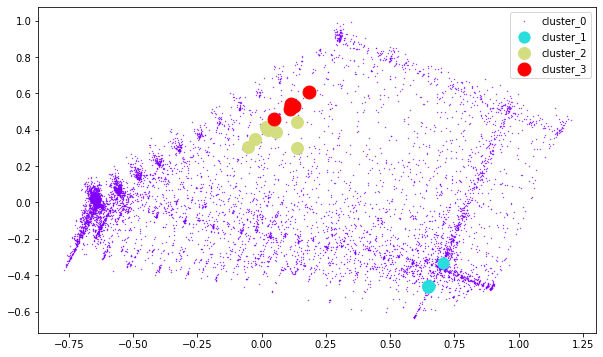

In [297]:
## visualzation
import matplotlib.cm as cm
plt.figure(figsize=(10,6))
color = cm.rainbow(np.linspace(0,1,max(Clusters)+1))
for clstr,color in zip(range(max(Clusters)+1), color):
    subset = pca_component_visual[df_data['Class'] == clstr]
    plt.scatter(subset[:,0], subset[:,1], c=color, s = (1000/len(subset)), label ='cluster_'+str(clstr))
    plt.legend()